<a href="https://colab.research.google.com/github/depradaboris/CrimenesClustering/blob/main/Crimenes_dePradaBoris_FernandezDana_GaticaGerman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Laboratorio Crimenes - Clustering
Dana Fernández, Boris De Prada, German Gatica

In [1]:
# Importar bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs  # Utilizamos make_blobs para generar datos de muestra
from sklearn.cluster import KMeans  # Importar el modelo de clustering KMeans

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Ruta al archivo CSV que contiene los datos sobre crímenes
ruta_acceso = '/content/drive/MyDrive/Crimenes.csv'

# Cargar los datos desde el archivo CSV en un DataFrame usando pandas
df = pd.read_csv(ruta_acceso)

# Mostrar las últimas filas del DataFrame para revisar los datos cargados
df.tail()


,Estado,Asesinatos,Asaltos,Poblacion Urbana,Violaciones
45,Virginia,8.5,156,63,20.7
46,Washington,4.0,145,73,26.2
47,West Virginia,5.7,81,39,9.3
48,Wisconsin,2.6,53,66,10.8
49,Wyoming,6.8,161,60,15.6


##Visualización de los datos, fuimos probando entre las características para ver como estaban distribuidos los datos

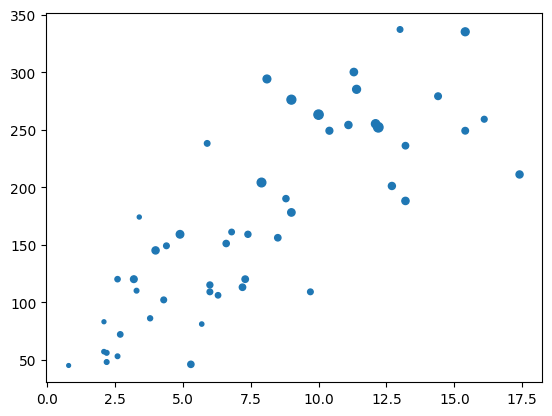

In [4]:
plt.scatter(df['Asesinatos'], df['Asaltos'],df['Violaciones'])
plt.show()

In [5]:
crimenes = df[['Asesinatos', 'Asaltos', 'Violaciones']]

###Acá dejamos afuera a la población total, porque si bien incide en la cantidad de asaltos, mirando los datos nos dimos cuenta que no era tan relevante, o habia tanta correlación entre los delitos y la cant población.

In [6]:
estados = df['Estado']

In [7]:
from sklearn.preprocessing import StandardScaler
# Normalizar los datos para que todas las variables tengan la misma escala
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['Asesinatos', 'Asaltos', 'Violaciones']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

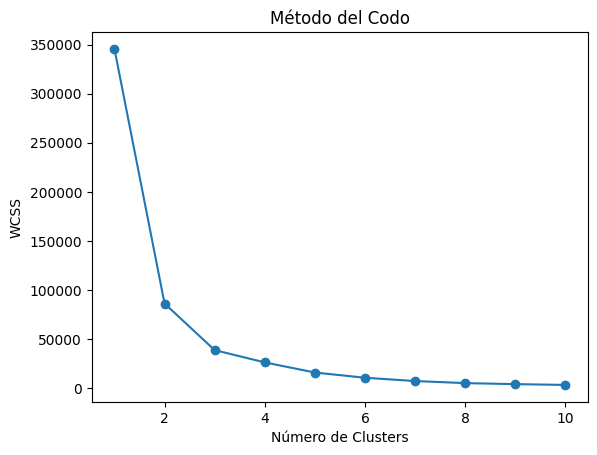

In [8]:
# Encuentra el número óptimo de clusters usando el método del codo
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(crimenes)
    wcss.append(kmeans.inertia_)

# Grafica la curva del codo
plt.plot(range(1, 11), wcss,'-o')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')  # Suma de cuadrados intra-cluster
plt.show()

##Aplicamos el algoritmo K-Means con 3 clústers porque es la cantidad óptima según la curva. Quedan 3 zonas, peligrosidad alta, baja y media.


In [9]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_data)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [10]:
# Agregar las etiquetas de los clusters al DataFrame
df['Categoria'] = kmeans.labels_

In [11]:
# Revertir la transformación de escala para obtener los centroides en las unidades originales
centroids = scaler.inverse_transform(kmeans.cluster_centers_)

Cada punto en el gráfico de dispersión representa un estado.
Los ejes x e y representan las tasas de asesinatos y asaltos, respectivamente.
El color de cada punto indica la categoría a la que pertenece el estado, según la columna 'Categoria' en el DataFrame.
Los puntos están dispersos en el espacio tridimensional definido por las tasas de asesinatos, asaltos y violaciones.
Los puntos marcados con "X" de color rojo representan los centroides de los clusters.
Estos centroides son los puntos centrales de cada grupo de estados según el algoritmo de agrupación utilizado.


In [12]:
# Imprimir los estados clasificados
print("Estados clasificados:")
print(df[['Estado', 'Asesinatos', 'Asaltos', 'Violaciones', 'Categoria']])

Estados clasificados:
            Estado  Asesinatos  Asaltos  Violaciones  Categoria
0          Alabama        13.2      236         21.2          2
1           Alaska        10.0      263         44.5          2
2          Arizona         8.1      294         31.0          2
3         Arkansas         8.8      190         19.5          1
4       California         9.0      276         40.6          2
5         Colorado         7.9      204         38.7          2
6      Connecticut         3.3      110         11.1          0
7         Delaware         5.9      238         15.8          1
8          Florida        15.4      335         31.9          2
9          Georgia        17.4      211         25.8          2
10          Hawaii         5.3       46         20.2          0
11           Idaho         2.6      120         14.2          0
12        Illinois        10.4      249         24.0          2
13         Indiana         7.2      113         21.0          1
14            Iowa

###Visualización por Zonas de Peligrosidad

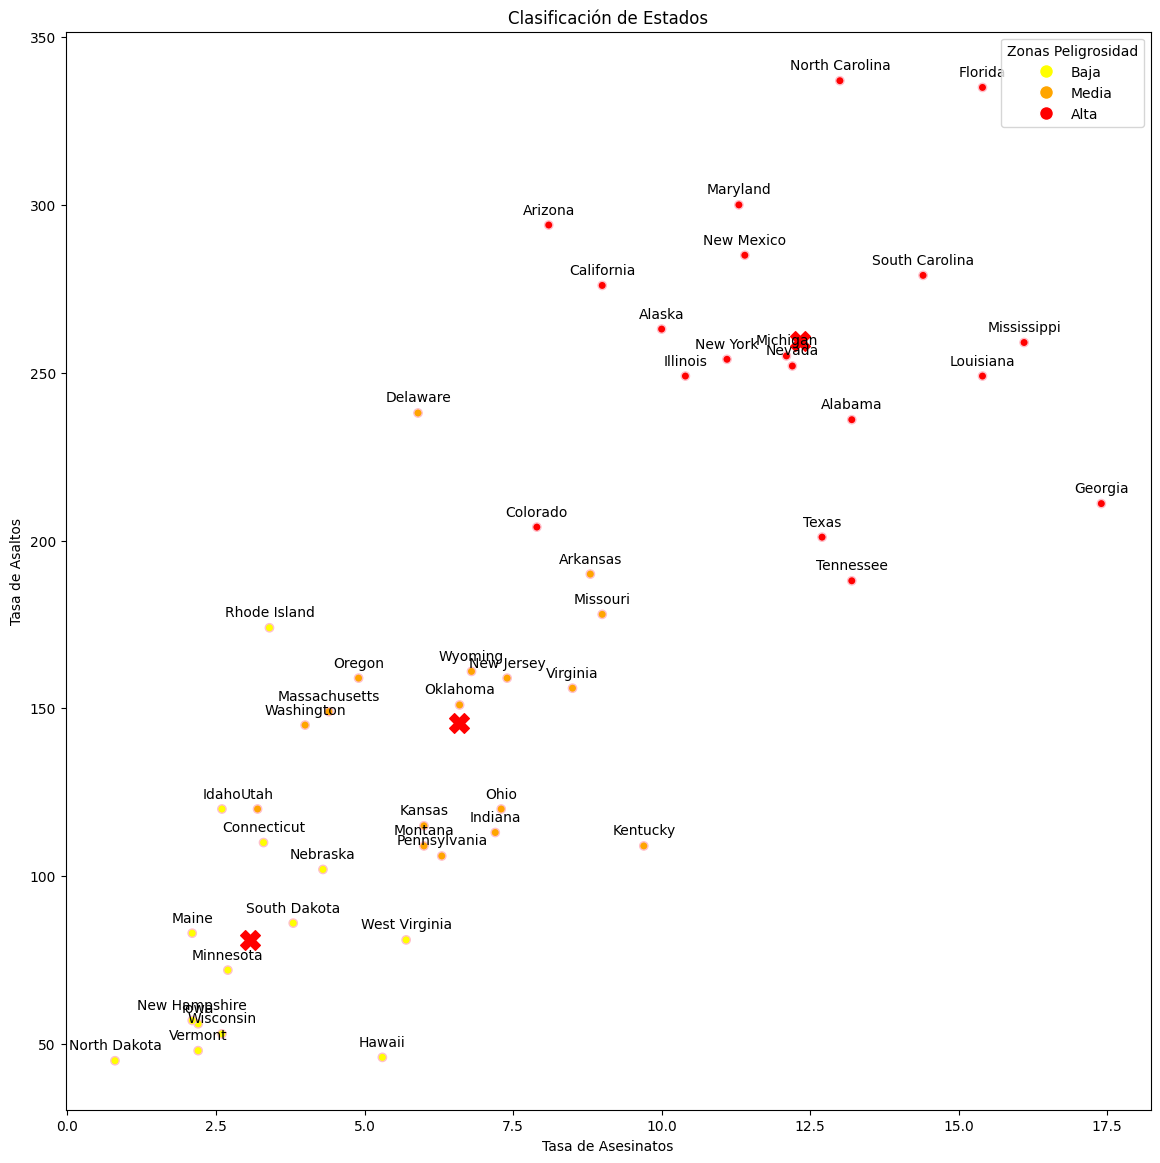

In [13]:
#'Labels' contiene las etiquetas de cluster asignadas a cada punto
labels = kmeans.labels_

# Define nombres y colores para cada cluster
nombres_clusters = {0: 'Baja', 1: 'Media', 2: 'Alta'}
colores_clusters = {0: 'yellow', 1: 'orange', 2: 'red'}

# Visualización
plt.figure(figsize=(14, 14))

# Crear un gráfico de dispersión para los puntos de datos con etiquetas de cluster
scatter = plt.scatter(df['Asesinatos'], df['Asaltos'], c=[colores_clusters[label] for label in labels], marker='o', edgecolors='pink')

# Agregar los centroides al gráfico
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, c='red', label='Centroides')

# Configuración del gráfico
plt.title('Clasificación de Estados')
plt.xlabel('Tasa de Asesinatos')
plt.ylabel('Tasa de Asaltos')

# Añadir leyenda para los clusters
legend_labels = list(set(labels))  # Obtener las etiquetas únicas
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colores_clusters[label], markersize=10) for label in legend_labels]
plt.legend(legend_handles, [nombres_clusters[label] for label in legend_labels], title='Zonas Peligrosidad')

# Añadir anotaciones con nombres de estados
for i, estado in enumerate(estados):
    plt.annotate(estado, (df['Asesinatos'][i], df['Asaltos'][i]), textcoords="offset points", xytext=(0, 8), ha='center')

# Mostrar el gráfico
plt.show()
